# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

## Dataset Info

* CLIENTNUM
  - Client number. Unique identifier for the customer holding the account

* Attrition_Flag
  - Internal event (customer activity) variable - if the account is closed then 1 else 0

* Customer_Age
  - Demographic variable - Customer's Age in Years

* Gender
  - Demographic variable - M=Male, F=Female

* Dependent_count
  - Demographic variable - Number of dependents

* Education_Level
  - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


* Marital_Status
  - Demographic variable - Married, Single, Divorced, Unknown

* Income_Category
  - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


* Card_Category
  - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book
  - Period of relationship with bank


* Total_Relationship_Count
  - Total no. of products held by the customer

* Months_Inactive_12_mon
  - No. of months inactive in the last 12 months

* Contacts_Count_12_mon
  - No. of Contacts in the last 12 months

* Credit_Limit
  - Credit Limit on the Credit Card

* Total_Revolving_Bal
  - Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy
  - Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1
  - Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt
  - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct
  - Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1
  - Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio
  - Average Card Utilization Ratio




# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [1]:
# import libraries

import pandas as pd   #used for data manipulation and analysis
import numpy as np    #used for mathematical and logical operations
import matplotlib.pyplot as plt #tool used for creating quick and straightforward visualizations
import seaborn as sns #used for data visualization and EDA. Seaborn works easily with dataframes and the Pandas library

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('dataset_bank.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
data_all = pd.read_csv('dataset_bank.csv')
data_all.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
target = data_all.Attrition_Flag
target
target = target.replace({'Existing Customer': '0', 'Attrited Customer': '1'})
target

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: object

In [6]:
df = data_all.drop(columns = ['CLIENTNUM','Attrition_Flag'], axis = 1)
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  float64
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: flo

In [8]:
df_cat = df.select_dtypes(include = ['object'])
df_cat.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           10127 non-null  object
 1   Education_Level  10127 non-null  object
 2   Marital_Status   10127 non-null  object
 3   Income_Category  10127 non-null  object
 4   Card_Category    10127 non-null  object
dtypes: object(5)
memory usage: 395.7+ KB


In [9]:
df_num.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Customer_Age                   AxesSubplot(0.125,0.125;0.0466867x0.755)
Dependent_count             AxesSubplot(0.181024,0.125;0.0466867x0.755)
Months_on_book              AxesSubplot(0.237048,0.125;0.0466867x0.755)
Total_Relationship_Count    AxesSubplot(0.293072,0.125;0.0466867x0.755)
Months_Inactive_12_mon      AxesSubplot(0.349096,0.125;0.0466867x0.755)
Contacts_Count_12_mon        AxesSubplot(0.40512,0.125;0.0466867x0.755)
Credit_Limit                AxesSubplot(0.461145,0.125;0.0466867x0.755)
Total_Revolving_Bal         AxesSubplot(0.517169,0.125;0.0466867x0.755)
Avg_Open_To_Buy             AxesSubplot(0.573193,0.125;0.0466867x0.755)
Total_Amt_Chng_Q4_Q1        AxesSubplot(0.629217,0.125;0.0466867x0.755)
Total_Trans_Amt             AxesSubplot(0.685241,0.125;0.0466867x0.755)
Total_Trans_Ct              AxesSubplot(0.741265,0.125;0.0466867x0.755)
Total_Ct_Chng_Q4_Q1         AxesSubplot(0.797289,0.125;0.0466867x0.755)
Avg_Utilization_Ratio       AxesSubplot(0.853313,0.125;0.0466867

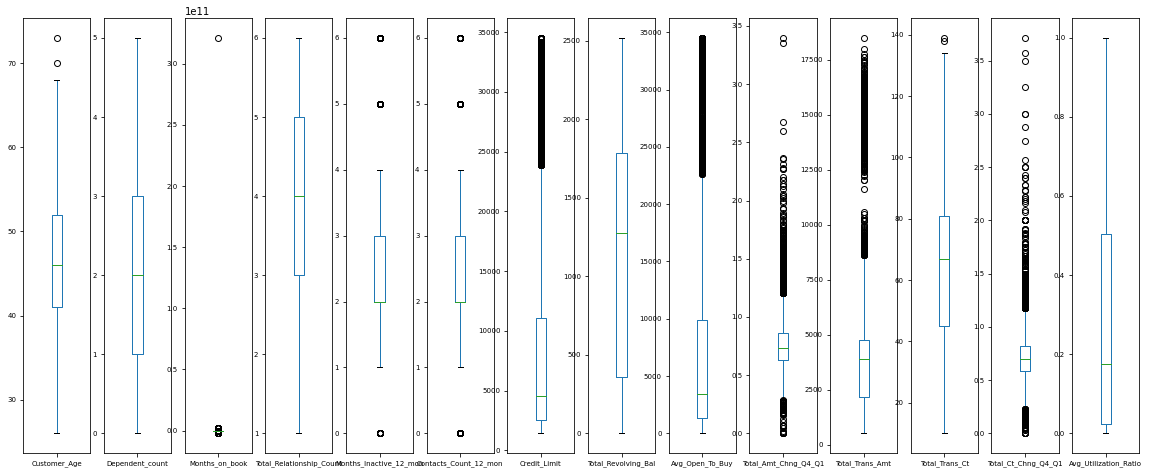

In [10]:
df_num.plot(kind='box',subplots = True, figsize=(20,8), fontsize = 7, sharex = False)

## 1. Data preprocessing, normalization, missing data, categorical data

In [11]:
a = df_num.Customer_Age.value_counts(bins = 10)
b = df_num.Dependent_count.value_counts()
c = df_num.Months_on_book.value_counts(bins = 10)
d = df_num.Total_Relationship_Count.value_counts()
e = df_num.Months_Inactive_12_mon.value_counts(sort = True, bins = 10)
f = df_num.Contacts_Count_12_mon.value_counts(bins = 10)
g = df_num.Credit_Limit.value_counts(bins = 10)
h = df_num.Total_Revolving_Bal.value_counts(bins = 10)
i = df_num.Avg_Open_To_Buy.value_counts(bins = 10)
j = df_num.Total_Amt_Chng_Q4_Q1.value_counts(bins = 10)
k = df_num.Total_Trans_Amt.value_counts(bins = 10)
l = df_num.Total_Trans_Ct.value_counts(bins = 10)
m = df_num.Total_Ct_Chng_Q4_Q1.value_counts(bins = 10)
n = df_num.Avg_Utilization_Ratio.value_counts(bins = 10)

a, b, c, d, e, f, g, h, i, j, k, l, m, n

((44.8, 49.5]                  2422
 (49.5, 54.2]                  1920
 (40.1, 44.8]                  1778
 (35.4, 40.1]                  1478
 (54.2, 58.9]                   921
 (30.7, 35.4]                   654
 (58.9, 63.6]                   535
 (25.951999999999998, 30.7]     265
 (63.6, 68.3]                   152
 (68.3, 73.0]                     2
 Name: Customer_Age, dtype: int64,
 3    2732
 2    2655
 1    1838
 4    1574
 0     904
 5     424
 Name: Dependent_count, dtype: int64,
 (-2470631130.648, 30167264717.7]    10126
 (288685251635.3, 321000000000.0]        1
 (30167264717.7, 62482013082.4]          0
 (62482013082.4, 94796761447.1]          0
 (94796761447.1, 127111509811.8]         0
 (127111509811.8, 159426258176.5]        0
 (159426258176.5, 191741006541.2]        0
 (191741006541.2, 224055754905.9]        0
 (224055754905.9, 256370503270.6]        0
 (256370503270.6, 288685251635.3]        0
 Name: Months_on_book, dtype: int64,
 3    2305
 4    1912
 5    1891
 

In [12]:
df_num.isna().sum()

Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
df_cat.isna().sum()

Gender             0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
dtype: int64

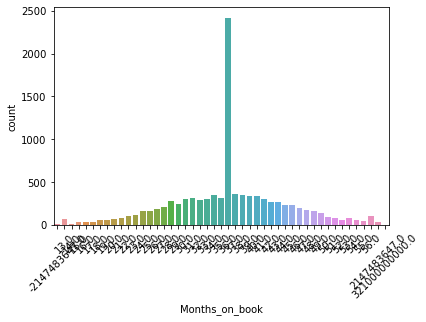

In [14]:
plot=sns.countplot(x='Months_on_book', data=df_num)
plt.xticks(rotation=45)
plt.show()

In [15]:
mob = df_num.Months_on_book
maxx = mob.max()
minn = mob.min()
print(minn, maxx)

-2147483647.0 321000000000.0


In [16]:
mob[mob<0].unique()[0]

-2147483647.0

In [17]:
mob[mob>100].unique()

array([2.14748365e+09, 3.21000000e+11])

In [18]:
df_num['Months_on_book']=df_num.Months_on_book.replace({-2147483647.0:np.nan,
                                                       2147483647.0:np.nan,
                                                       3.21000000e+11:np.nan})

In [19]:
df_num.Months_on_book.value_counts(bins = 10, sort = False)

(12.956000000000001, 17.3]     188
(17.3, 21.6]                   278
(21.6, 25.9]                   546
(25.9, 30.2]                  1208
(30.2, 34.5]                  1262
(34.5, 38.8]                  3436
(38.8, 43.1]                  1515
(43.1, 47.4]                   825
(47.4, 51.7]                   479
(51.7, 56.0]                   338
Name: Months_on_book, dtype: int64

In [20]:
df_num.Months_on_book.isna().sum()

52

In [21]:
df_num.Months_on_book.describe()

count    10075.000000
mean        35.929032
std          8.006885
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

In [22]:
import collections
mob_null = df_num.Months_on_book.isna()
counter=collections.Counter(mob_null)

print(counter)

Counter({False: 10075, True: 52})


## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

In [23]:
import sklearn
from sklearn.impute import SimpleImputer

In [24]:
mob_imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean') # go definirame Simple imputer, stratgegijata = mean
df_num.Months_on_book = mob_imputer.fit_transform(df_num['Months_on_book'].values.reshape(-1,1))[:,0]

In [25]:
mob_null = df_num.Months_on_book.isna()
counter=collections.Counter(mob_null)

print(counter)

Counter({False: 10127})


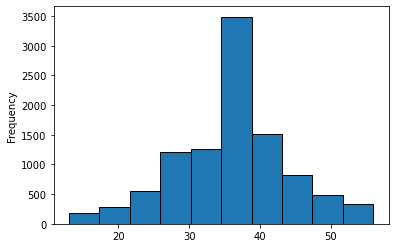

In [26]:
df_num.Months_on_book.plot.hist(edgecolor='k')
plt.show()

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler # za varijablite so outleeri

robscal = RobustScaler()

In [28]:
df_num_rs = df_num.copy()
df_num_rs.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler # za varijablite so outleeri

robscal = RobustScaler()
columnsO = ['Months_on_book','Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']
    
df_num_rs[columnsO] = robscal.fit_transform(df_num_rs[columnsO])

In [30]:
from sklearn.preprocessing import StandardScaler # za varijablite bez outleeri
standscal = StandardScaler()

In [31]:
columnsNO = ['Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
            'Total_Revolving_Bal', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

df_num_rs[columnsNO] = standscal.fit_transform(df_num_rs[columnsNO])

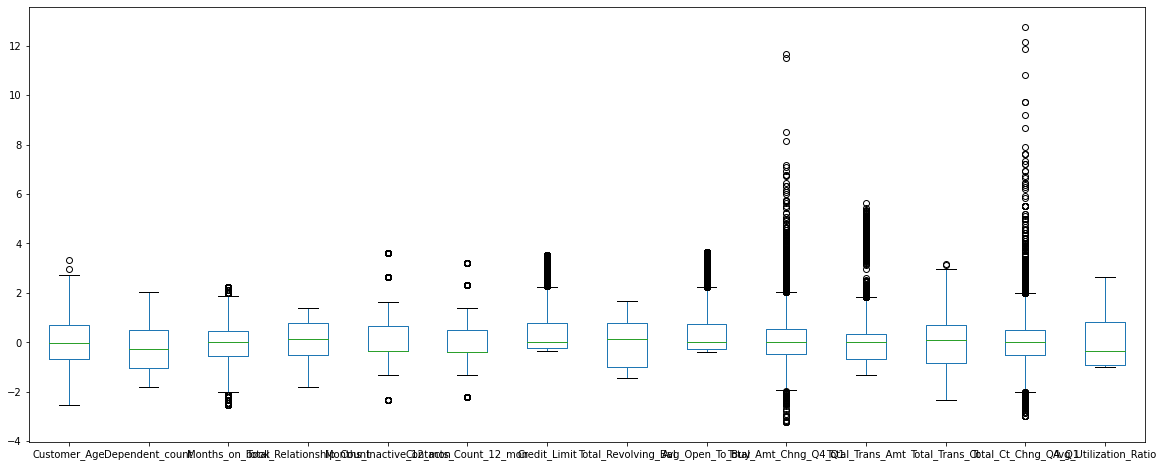

In [32]:
df_num_rs.plot(kind='box', figsize=(20,8), label="numericki varijabli")
plt.show()

In [33]:
y1 = target.copy()
df_cat_cb = df_cat.copy()

#skaliranje so CatBoost
import category_encoders as ce

cat_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category']

catBoostEncoder = ce.CatBoostEncoder(cols=cat_columns)

df_cat_cb = catBoostEncoder.fit_transform(df_cat_cb, y1)

In [34]:
df_cat_cb.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0.160660,0.16066,0.160660,0.16066,0.160660
1,0.160660,0.16066,0.160660,0.16066,0.080330
2,0.080330,0.08033,0.080330,0.16066,0.053553
3,0.080330,0.08033,0.160660,0.08033,0.040165
4,0.053553,0.16066,0.053553,0.08033,0.032132


In [36]:
frames = [df_num_rs, df_cat_cb]

X_cb = pd.concat(frames, axis = 1)
X_cb.shape

(10127, 19)

In [37]:
# One Hot Encoder
df_cat_ohe = df_cat.copy()
df_cat_ohe.columns

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [38]:
from sklearn.preprocessing import OneHotEncoder

transformer2 = OneHotEncoder(sparse=False) #Will return sparse matrix if set True else will return an array

one_hot_encoder = transformer2.fit_transform(df_cat_ohe)

df_cat_ohe = pd.concat([df_cat_ohe, pd.DataFrame(one_hot_encoder)], axis='columns')

df_cat_ohe.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,0,1,2,3,4,...,13,14,15,16,17,18,19,20,21,22
0,M,High School,Married,$60K - $80K,Blue,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,F,Graduate,Single,Less than $40K,Blue,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,M,Graduate,Married,$80K - $120K,Blue,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,F,High School,Unknown,Less than $40K,Blue,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,M,Uneducated,Married,$60K - $80K,Blue,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
df_cat_ohe.drop(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis=1, inplace=True)

In [40]:
df_cat_ohe.head(3)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
frames = [df_num_rs, df_cat_ohe]

X_ohe = pd.concat(frames, axis = 1)
X_ohe.shape

(10127, 37)

## 3. Classification models
- classical classification models
- deep neural networks

#### 3.1 CatBoost encoding - make the model (Decision Tree)

In [43]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_cb, y1, test_size=0.3, random_state=42)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtCBclass = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dtCBclass.fit(X1_train,y1_train)
y_pred_cb_dt = dtCBclass.predict(X1_test)
dtCBscore = accuracy_score(y1_test, y_pred_cb_dt)
dtCBscore

0.9437314906219151

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y1_test, y_pred_cb_dt, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.94      0.99      0.97      2543
    izleguva       0.94      0.70      0.80       496

    accuracy                           0.94      3039
   macro avg       0.94      0.85      0.89      3039
weighted avg       0.94      0.94      0.94      3039



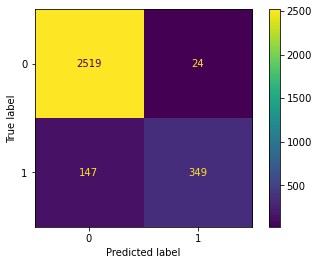

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtCBclass, X1_test, y1_test)

#### 3.2 CatBoost encoding - make the model (Random Forest)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfCB = RandomForestClassifier(random_state = 42)
rfCB.fit(X1_train,y1_train)
y_pred_cb_rf = rfCB.predict(X1_test)
rfCBscore = accuracy_score(y1_test, y_pred_cb_rf)
rfCBscore

0.9687397170121751

In [48]:
rfCB.score(X1_train, y1_train)

1.0

In [49]:
print(classification_report(y1_test, y_pred_cb_rf, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.97      0.99      0.98      2543
    izleguva       0.96      0.84      0.90       496

    accuracy                           0.97      3039
   macro avg       0.96      0.92      0.94      3039
weighted avg       0.97      0.97      0.97      3039



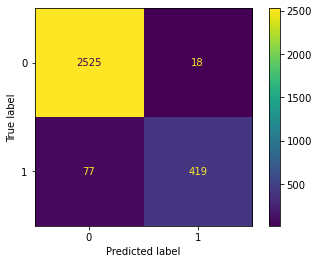

In [50]:
plot_confusion_matrix(rfCB, X1_test, y1_test)

#### 3.3 CatBoost encoding - make the model (KNN)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X1_train, y1_train)
    y_pred_kn = neigh.predict(X1_test)
    score = accuracy_score(y1_test, y_pred_kn)
    scores.append(score)

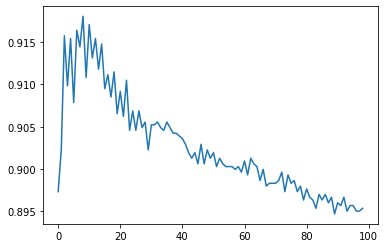

In [52]:
fig, ax = plt.subplots()

ax.plot(scores)
plt.show()

In [53]:
knnCB=KNeighborsClassifier(n_neighbors = 9)
knnCB.fit(X1_train, y1_train)
y_pred_cb_knn  = knnCB.predict(X1_test)
knnCBscore = accuracy_score(y1_test, y_pred_cb_knn)
knnCBscore

0.9180651530108588

In [54]:
knnCB.score(X1_train, y1_train)

0.9362302483069977

In [55]:
print(classification_report(y1_test, y_pred_cb_knn, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.93      0.98      0.95      2543
    izleguva       0.85      0.61      0.71       496

    accuracy                           0.92      3039
   macro avg       0.89      0.79      0.83      3039
weighted avg       0.91      0.92      0.91      3039



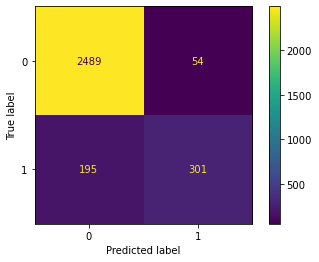

In [56]:
plot_confusion_matrix(knnCB, X1_test, y1_test)

In [57]:
print('CatBoost DecisionTree Score: {:.4f}' .format(dtCBclass.score(X1_test, y1_test)))
print('CatBoost Random Forest Score: {:.4f}' .format(rfCB.score(X1_test, y1_test)))
print('CatBoost KNN Score: {:.4f}' .format(knnCB.score(X1_test, y1_test)))

CatBoost DecisionTree Score: 0.9437
CatBoost Random Forest Score: 0.9687
CatBoost KNN Score: 0.9181


#### 3.4 One Hot encoding - make the model (Decision Tree)

In [58]:
# split train, test 
from sklearn.model_selection import train_test_split
X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test = train_test_split(X_ohe, y1, test_size=0.3, random_state=42)

In [59]:
# DT klasifikatorot
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtOHclass = DecisionTreeClassifier(max_depth =10, random_state = 20) #menuvaj
dtOHclass.fit(X_ohe_train,y_ohe_train)
y_pred_dt = dtOHclass.predict(X_ohe_test)
dtscoreOH = accuracy_score(y_ohe_test, y_pred_dt)
dtscoreOH

0.9368213228035538

In [60]:
dtOHclass.score(X_ohe_train, y_ohe_train)

0.9929458239277652

In [61]:
print(classification_report(y_ohe_test, y_pred_dt, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.96      0.97      0.96      2543
    izleguva       0.83      0.78      0.80       496

    accuracy                           0.94      3039
   macro avg       0.89      0.87      0.88      3039
weighted avg       0.94      0.94      0.94      3039



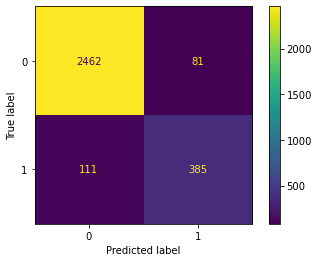

In [62]:
plot_confusion_matrix(dtOHclass, X_ohe_test, y_ohe_test)

#### 3.5 One Hot encoding - make the model (Random Forest)

In [63]:
# RandomForst klasifikator
rfOH = RandomForestClassifier(random_state = 42)
rfOH.fit(X_ohe_train,y_ohe_train)
y_pred_rf = rfOH.predict(X_ohe_test)
rfOHscore = accuracy_score(y_ohe_test, y_pred_rf)
rfOHscore

0.9506416584402764

In [64]:
rfOH.score(X_ohe_train, y_ohe_train)

1.0

In [65]:
print(classification_report(y_ohe_test, y_pred_rf, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.95      0.99      0.97      2543
    izleguva       0.93      0.75      0.83       496

    accuracy                           0.95      3039
   macro avg       0.94      0.87      0.90      3039
weighted avg       0.95      0.95      0.95      3039



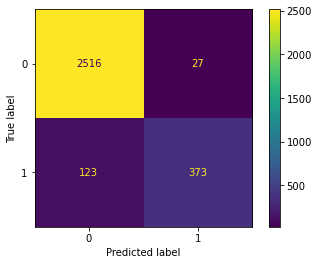

In [66]:
plot_confusion_matrix(rfOH, X_ohe_test, y_ohe_test)

#### 3.6 One Hot encoding - make the model (KNN)

In [67]:
# find best k
scores = []
for k in range(1, 100):
    neigh_oh = KNeighborsClassifier(n_neighbors=k)
    neigh_oh.fit(X_ohe_train,y_ohe_train)
    y_pred_kn = neigh_oh.predict(X_ohe_test)
    score = accuracy_score(y_ohe_test, y_pred_kn)
    scores.append(score)

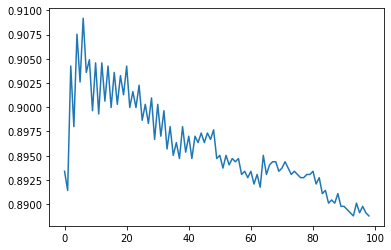

In [68]:
# plot the results (scores)
fig, ax = plt.subplots()

ax.plot(scores)
plt.show()

In [69]:
# KNN klasifikatorot
knnOH=KNeighborsClassifier(n_neighbors = 7)
knnOH.fit(X_ohe_train,y_ohe_train)
y_predOH_knn  = knnOH.predict(X_ohe_test)
knnOHscore = accuracy_score(y_ohe_test, y_predOH_knn)
knnOHscore

0.9091806515301086

In [70]:
knnOH.score(X_ohe_train, y_ohe_train)

0.9297404063205418

In [71]:
print(classification_report(y_ohe_test, y_predOH_knn, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.92      0.98      0.95      2543
    izleguva       0.84      0.55      0.66       496

    accuracy                           0.91      3039
   macro avg       0.88      0.76      0.81      3039
weighted avg       0.90      0.91      0.90      3039



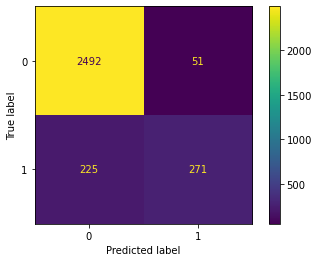

In [72]:
plot_confusion_matrix(knnOH, X_ohe_test, y_ohe_test)

In [73]:
print('OneHot DecisionTree Score: {:.4f}' .format(dtOHclass.score(X_ohe_test, y_ohe_test)))
print('OneHot Random Forest Score: {:.4f}' .format(rfOH.score(X_ohe_test, y_ohe_test)))
print('OneHot KNN Score: {:.4f}' .format(knnOH.score(X_ohe_test, y_ohe_test)))

OneHot DecisionTree Score: 0.9368
OneHot Random Forest Score: 0.9506
OneHot KNN Score: 0.9092


In [74]:
!pip install tabulate

In [75]:
from tabulate import tabulate

ms = [["DecisionTree", dtCBclass.score(X1_test,y1_test), dtOHclass.score(X_ohe_test, y_ohe_test)],
     ["RandomForest", rfCB.score(X1_test,y1_test), rfOH.score(X_ohe_test, y_ohe_test)],
     ["KNN", knnCB.score(X1_test,y1_test), knnOH.score(X_ohe_test, y_ohe_test)]]


In [76]:
print(tabulate(ms , headers=["Classifier", "CatBoost_(CB)", "OneHot_OHE"] ))


Classifier      CatBoost_(CB)    OneHot_OHE
------------  ---------------  ------------
DecisionTree         0.943731      0.936821
RandomForest         0.96874       0.950642
KNN                  0.918065      0.909181


### 
* Best results are obtained with CatBoost Encoding by using Random Forest Classifier
* We will use CatBoost encoded dataset for Feature Selection process

#### 4. Feature Selection
* bidejki CatBoost dava podobri rezultati, toj encoding (podatocno mnozestvo) e koristen za Feature Selection
 

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest code here
selector = SelectKBest(f_classif, k=14)

selector_fit = selector.fit(X1_train, y1_train)

dfscores = pd.DataFrame(selector_fit.scores_)
dfcolumns = pd.DataFrame(X1_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score'))  # imav 15, posto 15ta bese Customer_Age so score 8.539, skoro 10 pati pomal score, ja iskluciv

                       Specs        Score
11            Total_Trans_Ct  1198.671621
12       Total_Ct_Chng_Q4_Q1   647.004725
7        Total_Revolving_Bal   565.085266
5      Contacts_Count_12_mon   337.598429
13     Avg_Utilization_Ratio   247.007602
10           Total_Trans_Amt   238.223334
4     Months_Inactive_12_mon   171.759731
3   Total_Relationship_Count   158.268176
9       Total_Amt_Chng_Q4_Q1   127.286307
14                    Gender   101.071788
18             Card_Category    96.967672
16            Marital_Status    94.267082
15           Education_Level    93.110430
17           Income_Category    85.817384


In [78]:
X1_new_train = selector_fit.transform(X1_train)
X1_new_train.shape

(7088, 14)

In [79]:
X1_new_test = X1_test.drop(['Avg_Open_To_Buy','Credit_Limit','Customer_Age','Dependent_count','Months_on_book'], axis = 1)
X1_new_test.shape

(3039, 14)

In [80]:
7088+3039  # 10127 e OK

10127

In [81]:
# Decision Tree so feature selection(14)

dtFSclass = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dtFSclass.fit(X1_new_train,y1_train)
y_pred_dtFS = dtFSclass.predict(X1_new_test)
dtFSscore = accuracy_score(y1_test, y_pred_dtFS)
dtFSscore

0.9430733794011188

In [82]:
print(classification_report(y1_test, y_pred_dtFS, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.95      0.99      0.97      2543
    izleguva       0.93      0.71      0.80       496

    accuracy                           0.94      3039
   macro avg       0.94      0.85      0.88      3039
weighted avg       0.94      0.94      0.94      3039



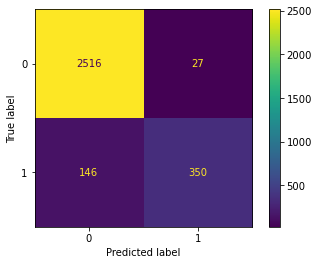

In [83]:
plot_confusion_matrix(dtFSclass, X1_new_test, y1_test)

In [84]:
# RandomForest so feature selection(14)

rfFS = RandomForestClassifier(random_state = 42)
rfFS.fit(X1_new_train,y1_train)
y_pred_rfFS = rfFS.predict(X1_new_test)
rfFSscore = accuracy_score(y1_test, y_pred_rfFS)
rfFSscore

0.9700559394537677

In [85]:
print(classification_report(y1_test, y_pred_rfFS, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.97      0.99      0.98      2543
    izleguva       0.96      0.85      0.90       496

    accuracy                           0.97      3039
   macro avg       0.97      0.92      0.94      3039
weighted avg       0.97      0.97      0.97      3039



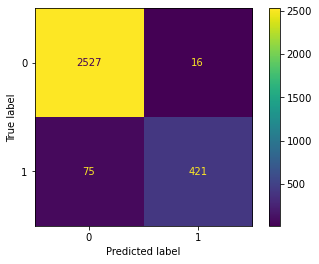

In [86]:
plot_confusion_matrix(rfFS, X1_new_test, y1_test)

In [87]:
#KNN so feature selection(14)

knnFS=KNeighborsClassifier(n_neighbors = 9)
knnFS.fit(X1_new_train, y1_train)
y_pred_knnFS  = knnFS.predict(X1_new_test)
knnFSscore = accuracy_score(y1_test, y_pred_knnFS)
knnFSscore

0.924646265218822

In [88]:
print(classification_report(y1_test, y_pred_knnFS, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.94      0.98      0.96      2543
    izleguva       0.84      0.66      0.74       496

    accuracy                           0.92      3039
   macro avg       0.89      0.82      0.85      3039
weighted avg       0.92      0.92      0.92      3039



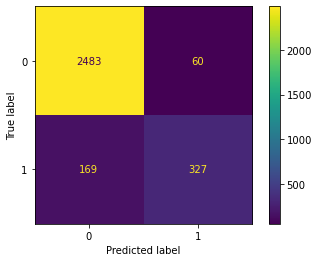

In [89]:
plot_confusion_matrix(knnFS, X1_new_test, y1_test)

In [91]:
hh = [["DecisionTree", dtCBclass.score(X1_test,y1_test), dtFSclass.score(X1_new_test,y1_test)],
     ["RandomForest", rfCB.score(X1_test,y1_test), rfFS.score(X1_new_test,y1_test)],
     ["KNN", knnCB.score(X1_test,y1_test), knnFS.score(X1_new_test,y1_test)]]


In [92]:
print(tabulate(hh, headers=["Model", "CatBoost_(CB)", "Feature_Selection"] ))

Model           CatBoost_(CB)    Feature_Selection
------------  ---------------  -------------------
DecisionTree         0.943731             0.943073
RandomForest         0.96874              0.970056
KNN                  0.918065             0.924646


### 
* ima malo podobruvanje so Feature Selection vo rezultatot (0.968 ---> 0.970) kaj Random Forest

### 3.2 XGBoost

In [93]:
!pip install xgboost

In [94]:
import xgboost as xgb
from xgboost import XGBClassifier

In [95]:
# fit model on training data
model = XGBClassifier()
model.fit(X1_train, y1_train)
print(model)

[12:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [96]:
# make predictions for test data
y_pred_xg = model.predict(X1_test)

In [97]:
# evaluate predictions
accuracy = accuracy_score(y1_test, y_pred_xg)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.86%


In [98]:
print(classification_report(y1_test, y_pred_xg, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.98      0.99      0.99      2543
    izleguva       0.96      0.91      0.93       496

    accuracy                           0.98      3039
   macro avg       0.97      0.95      0.96      3039
weighted avg       0.98      0.98      0.98      3039



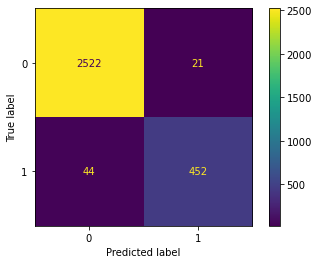

In [99]:
plot_confusion_matrix(model, X1_test, y1_test)

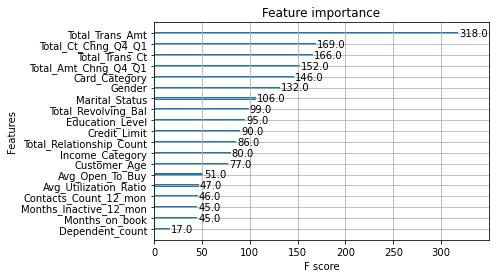

In [100]:
# evaluate feature importance
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [101]:
XGB_train = X1_train.drop(columns = (['Dependent_count','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon', 
                                      'Avg_Utilization_Ratio', 'Avg_Open_To_Buy']), axis = 1)

In [102]:
XGB_test = X1_test.drop(columns = (['Dependent_count','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon', 
                                    'Avg_Utilization_Ratio', 'Avg_Open_To_Buy']), axis = 1)

In [103]:
# fit model new model on training data
model_new = XGBClassifier()
model_new.fit(XGB_train, y1_train)

[12:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
# with new model, make predictions for test data
y_new_pred_xg = model_new.predict(XGB_test)

In [105]:
# evaluate predictions
accuracy = accuracy_score(y1_test, y_new_pred_xg)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.53%


In [106]:
print(classification_report(y1_test, y_new_pred_xg, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.98      0.99      0.99      2543
    izleguva       0.94      0.90      0.92       496

    accuracy                           0.98      3039
   macro avg       0.96      0.95      0.95      3039
weighted avg       0.98      0.98      0.98      3039



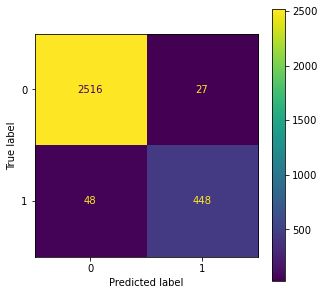

In [107]:
plot_confusion_matrix(model_new, XGB_test, y1_test)

In [108]:
# fit model with Feature Selection (FS) columns on training data
model_FS = XGBClassifier()
model_FS.fit(X1_new_train,y1_train)

[12:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
# make predictions with FS for test data
y_FS_pred_xg = model_FS.predict(X1_new_test)

In [110]:
# evaluate predictions
accuracy = accuracy_score(y1_test, y_FS_pred_xg)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.70%


In [111]:
print(classification_report(y1_test, y_FS_pred_xg, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.98      0.99      0.99      2543
    izleguva       0.95      0.91      0.93       496

    accuracy                           0.98      3039
   macro avg       0.97      0.95      0.96      3039
weighted avg       0.98      0.98      0.98      3039



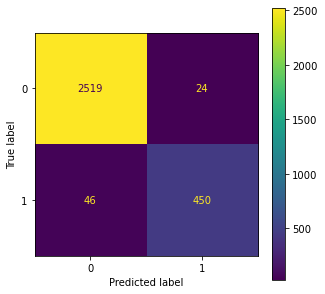

In [112]:
plot_confusion_matrix(model_FS, X1_new_test, y1_test)
plt.show()

## 4. Evaluation and comparisons, various metrics

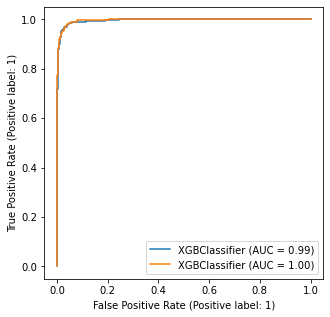

In [113]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
plot_xboost = plot_roc_curve(model_new, XGB_test,  y1_test, ax=ax)

ax = plt.gca()
plot_fs = plot_roc_curve(model_FS, X1_new_test, y1_test, ax=ax)

plt.show()

## 5. Hyperparameter Optimization

In [114]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [115]:
kf = KFold(n_splits=5, shuffle=True)
print(type(kf))
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'learning_rate': [0.1, 0.15, 0.2, 0.25],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


#create the GridSearch model and train it
model = GridSearchCV(estimator = model_FS, 
                     param_grid = params,
                     scoring = 'roc_auc',
                     cv = kf,
                     verbose = 5,
                    n_jobs = -1
                    )


<class 'sklearn.model_selection._split.KFold'>


In [116]:
model.fit(X1_new_train,y1_train) 

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
[13:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missin...
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
             

In [117]:
print("Best model: ", model.best_estimator_)
print("Best Parameters: ", model.best_params_)
print("Best score ", model.best_score_ * 100.0)

Best model:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)
Best Parameters:  {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}
Best score  99.56140244697048


In [118]:
best_model = XGBClassifier(colsample_bytree=0.6,gamma=0.5, learning_rate=0.15, max_depth=5, min_child_weight=1, 
                           subsample=1)
best_model.fit(X1_new_train,y1_train)

[14:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [119]:
# make predictions with FS test data
y_best_model_pred = best_model.predict(X1_new_test)

In [120]:
# evaluate predictions
accuracy = accuracy_score(y1_test, y_best_model_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.56%


In [121]:
print(classification_report(y1_test, y_best_model_pred, target_names=['ne izleguva','izleguva']))

              precision    recall  f1-score   support

 ne izleguva       0.98      0.99      0.99      2543
    izleguva       0.95      0.90      0.92       496

    accuracy                           0.98      3039
   macro avg       0.97      0.94      0.95      3039
weighted avg       0.98      0.98      0.98      3039



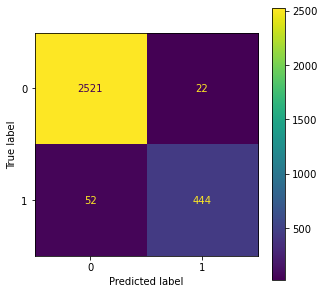

In [122]:
plot_confusion_matrix(best_model, X1_new_test, y1_test)
plt.show()

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

In [125]:
bm = [["RandomForest", rfFS.score(X1_new_test,y1_test)],
     ["XGBoost", best_model.score(X1_new_test,y1_test)]]

print(tabulate(bm, headers=["Model", "CatBoost_(CB)"]))


Model           CatBoost_(CB)
------------  ---------------
RandomForest         0.970056
XGBoost              0.97565


In [129]:
# store the best model as file

In [128]:
import pickle

filename = 'XGB_best_model'
pickle.dump(best_model, open(filename, 'wb'))

In [132]:
XGB_best_model = pickle.load(open(filename, 'rb'))
print(type(XGB_best_model))

<class 'xgboost.sklearn.XGBClassifier'>


## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect